In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                    # import necessary libraries for visualization

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('Zoo.csv')

In [5]:
df # dataframe

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
df.describe()  # description of the data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.info()  # all numeric columns except one #which is animal name so dropping it later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


#EDA and Preprocessing


In [8]:
df.isna().sum() # no missing values

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [9]:
# there are no missing values in the dataset

##Outliers - this data is for showing features  in 0 and 1 so i dont think there are outliers in this dataset.
#no point of checking outliers

## splitting dataset for training and testing

In [11]:
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop('animal name', axis=1)
X_test = X_test.drop('animal name', axis=1)  # dropping animal column as it is a categorical feature

In [13]:
# Create a KNN classifier with k=5 (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [15]:
y_pred = knn.predict(X_test) # predicting for model

In [16]:
accuracy = accuracy_score(y_test, y_pred) # accuraacy score
precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")  #all scores
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1-Score: 0.8957902001380263


visualizing decision boundaries for a KNN classifier with multiple features can be complex because of so many features so i am reducing it to 2 dimentions.

In [34]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [35]:
knn.fit(X_train_pca, y_train)


KNeighborsClassifier(metric='euclidean')

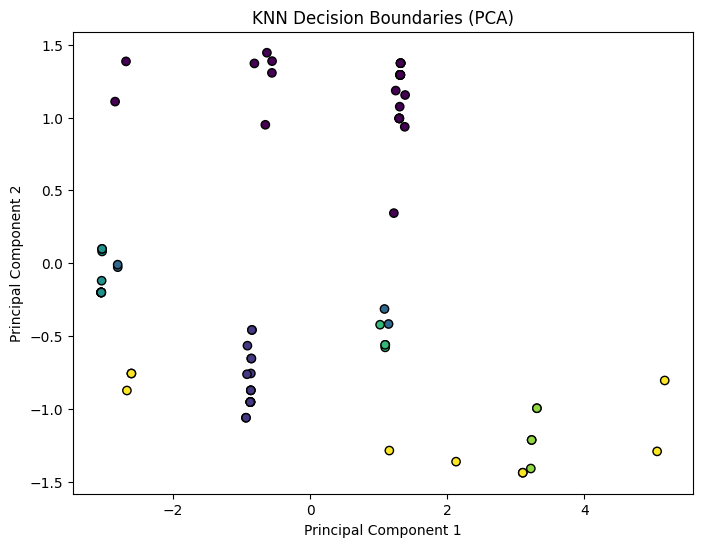

In [31]:
# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries (PCA')

# Plot decision boundaries
# Get the unique class labels
unique_labels = np.unique(y_train)
# Get the centroids of each class
centroids = [np.mean(X_train_pca[y_train == label], axis=0) for label in unique_labels]

plt.show()

#Interview questions

(1) What are the key hyperparameter in KNN?
ans.

1. n_neighbors: It decides no. of neighbors when making predictions.

2. metric: This hyperparameter defines the distance metric used to calculate the distance between data points.

3. weights: This hyperparameter determines how the neighbors' contributions are weighted when making a prediction.


(2) What distance metrics can be used in KNN?

ans.Euclidean Distance:

This is the most common distance metric, representing the straight-line distance between two points in a Euclidean space.

Manhattan Distance:

This metric, also known as taxicab distance or L1 distance, calculates the distance as the sum of absolute differences between corresponding features of two data points.

Minkowski Distance:

This encompasses both Euclidean and Manhattan distances as special cases.

Cosine Similarity:





